In [2]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
import random
import numpy as np
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
from qiskit.quantum_info import random_statevector
from math import sqrt, pi
from collections import defaultdict
import numpy as np
from scipy.linalg import sqrtm
import pandas
import matplotlib
import numpy
from qiskit import*
from qiskit.quantum_info.states import partial_trace
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
#definig states
qc=QuantumCircuit(4,4)

In [4]:
#initial states
qc.x(1)
qc.x(2)

In [5]:
#defining rotations
theta=np.pi/8
print(theta)

0.39269908169872414


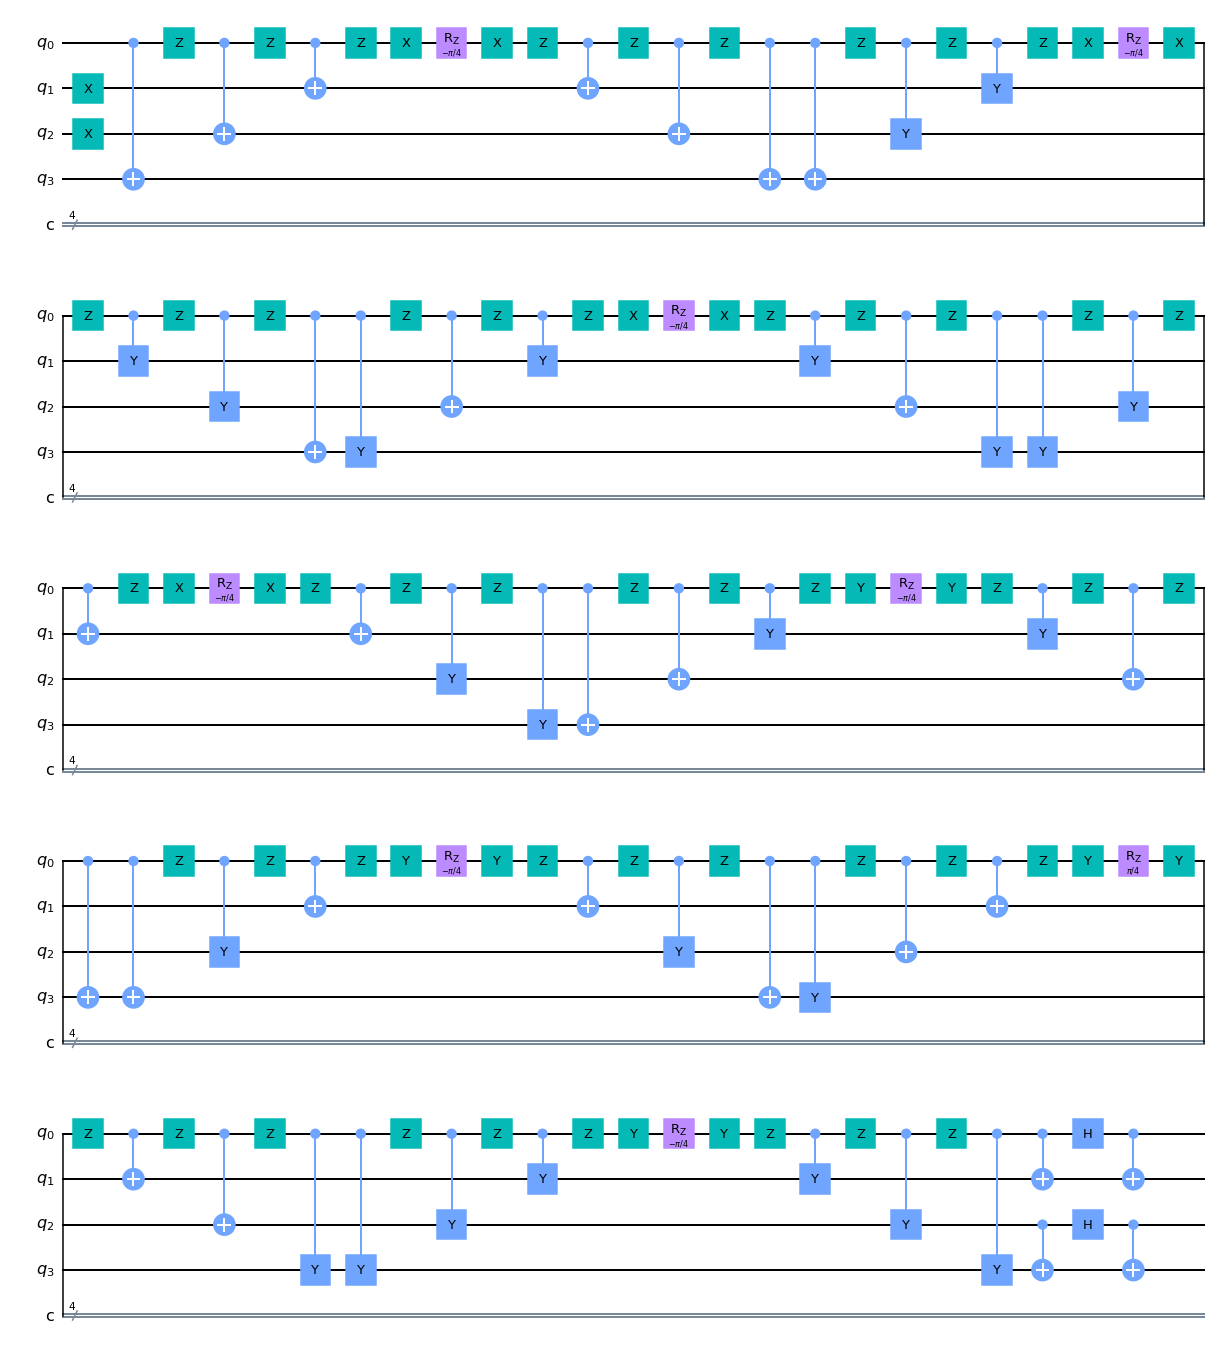

In [6]:


#U1
qc.cx(0,3)
qc.z(0)
qc.cx(0,2)
qc.z(0)
qc.cx(0,1)
qc.z(0)
qc.x(0)
qc.rz(-2*theta,0)
qc.x(0)
qc.z(0)
qc.cx(0,1)
qc.z(0)
qc.cx(0,2)
qc.z(0)
qc.cx(0,3)

#u2
qc.cx(0,3)
qc.z(0)
qc.cy(0,2)
qc.z(0)
qc.cy(0,1)
qc.z(0)
qc.x(0)
qc.rz(-2*theta,0)
qc.x(0)
qc.z(0)
qc.cy(0,1)
qc.z(0)
qc.cy(0,2)
qc.z(0)
qc.cx(0,3)

#U3
qc.cy(0,3)
qc.z(0)
qc.cx(0,2)
qc.z(0)
qc.cy(0,1)
qc.z(0)
qc.x(0)
qc.rz(-2*theta,0)
qc.x(0)
qc.z(0)
qc.cy(0,1)
qc.z(0)
qc.cx(0,2)
qc.z(0)
qc.cy(0,3)

#U4
qc.cy(0,3)
qc.z(0)
qc.cy(0,2)
qc.z(0)
qc.cx(0,1)
qc.z(0)
qc.x(0)
qc.rz(-2*theta,0)
qc.x(0)
qc.z(0)
qc.cx(0,1)
qc.z(0)
qc.cy(0,2)
qc.z(0)
qc.cy(0,3)

#U5
qc.cx(0,3)
qc.z(0)
qc.cx(0,2)
qc.z(0)
qc.cy(0,1)
qc.z(0)
qc.y(0)
qc.rz(-2*theta,0)
qc.y(0)
qc.z(0)
qc.cy(0,1)
qc.z(0)
qc.cx(0,2)
qc.z(0)
qc.cx(0,3)

#U6
qc.cx(0,3)
qc.z(0)
qc.cy(0,2)
qc.z(0)
qc.cx(0,1)
qc.z(0)
qc.y(0)
qc.rz(-2*theta,0)
qc.y(0)
qc.z(0)
qc.cx(0,1)
qc.z(0)
qc.cy(0,2)
qc.z(0)
qc.cx(0,3)

#U7
qc.cy(0,3)
qc.z(0)
qc.cx(0,2)
qc.z(0)
qc.cx(0,1)
qc.z(0)
qc.y(0)
qc.rz(2*theta,0)
qc.y(0)
qc.z(0)
qc.cx(0,1)
qc.z(0)
qc.cx(0,2)
qc.z(0)
qc.cy(0,3)


#U8
qc.cy(0,3)
qc.z(0)
qc.cy(0,2)
qc.z(0)
qc.cy(0,1)
qc.z(0)
qc.y(0)
qc.rz(-2*theta,0)
qc.y(0)
qc.z(0)
qc.cy(0,1)
qc.z(0)
qc.cy(0,2)
qc.z(0)
qc.cy(0,3)

qc.cx(0,1)
qc.h(0)
qc.cx(0,1)

qc.cx(2,3)

qc.h(2)
qc.cx(2,3)


qc.draw()


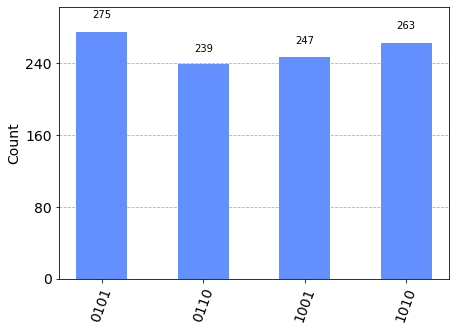

In [7]:
qc.measure([0,1],[0,1])
qc.measure([2,3],[2,3])


simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=simulator).result()
plot_histogram(result.get_counts(qc))




In [8]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')

ibmqfactory.load_account:WARNING:2022-12-13 04:07:27,662: Credentials are already in use. The existing account in the session will be replaced.


In [ ]:

backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 3 and
                                   not b.configuration().simulator and b.status().operational==True))
t_qc = transpile(qc, backend, optimization_level=3)
job = backend.run(t_qc)
job_monitor(job) 

Job Status: job is queued (2)     

In [ ]:
exp_result = job.result()

exp_counts = exp_result.get_counts(qc)

plot_histogram(exp_counts)

In [ ]:
print(exp_counts)

In [ ]:
post_selection_1 = {key: exp_counts[key] for key in exp_counts if key != '0101'}

post_selection_2 = {key: post_selection_1[key] for key in post_selection_1 if key != '1010'}

post_selection_final = post_selection_2

print(post_selection_final)

In [ ]:
plot_histogram(post_selection_final)

In [ ]:
total = (sum(post_selection_final.values()))

value1 = (post_selection_final.get('1001'))

value2 = (post_selection_final.get('0110'))


prob1 = value1/total

prob1percent = prob1*100

print( "probability of 0110 = " + str(prob1percent) + "%")


prob2 = value2/total

prob2percent = prob2*100

print( "probability of 0110 = " + str(prob2percent) + "%")


error = (total - value1 - value2)

errorprob = error/total

error_percentage = errorprob*100 

print( "error percentage = " + str(error_percentage) + "%")